In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from sklearn.datasets import load_breast_cancer
files = load_breast_cancer()
df = pd.DataFrame(files.data, columns=files.feature_names)
df['target']=files.target

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [32]:
#sns.pairplot(df, hue='target')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

- 이상치 유무 확인

C:\Users\ICT01_02\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


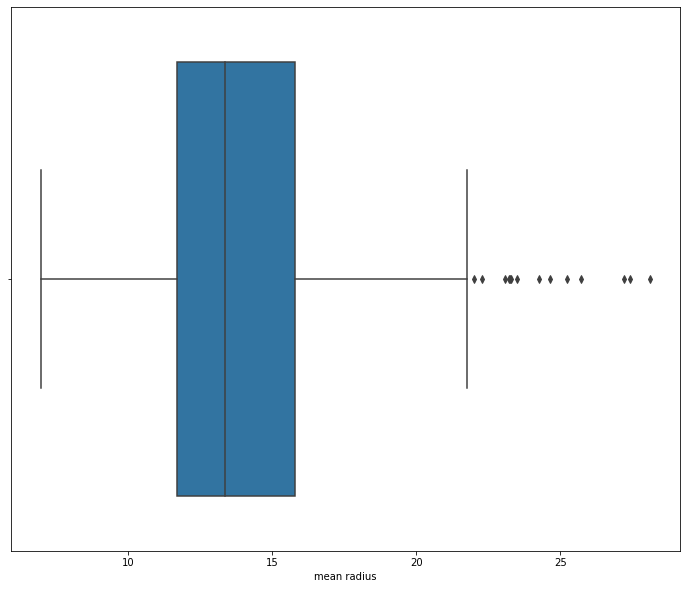

In [34]:
plt.figure(figsize=(12,10))
sns.boxplot(df.iloc[:,0])
plt.show()

C:\Users\ICT01_02\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


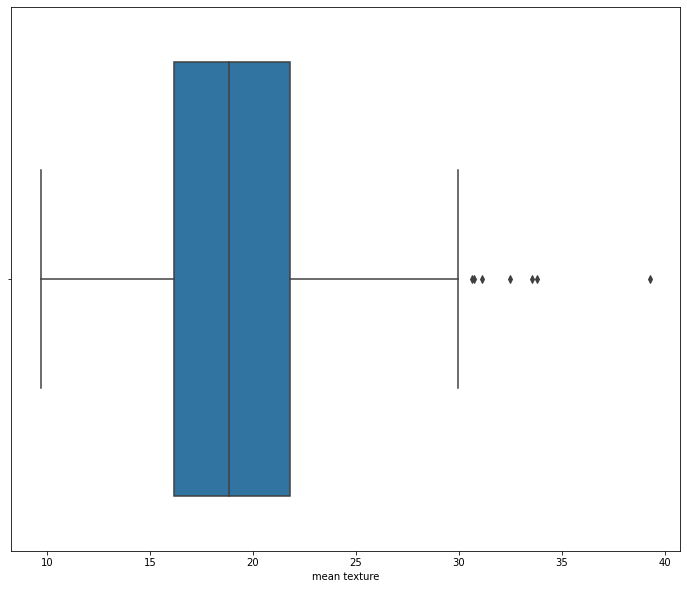

In [35]:
plt.figure(figsize=(12,10))
sns.boxplot(df.iloc[:,1])
plt.show()

- 대충봐도 이상치 모든 열에 존재,, robust 함수를 써주도록 하자

- train, test data set

In [36]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

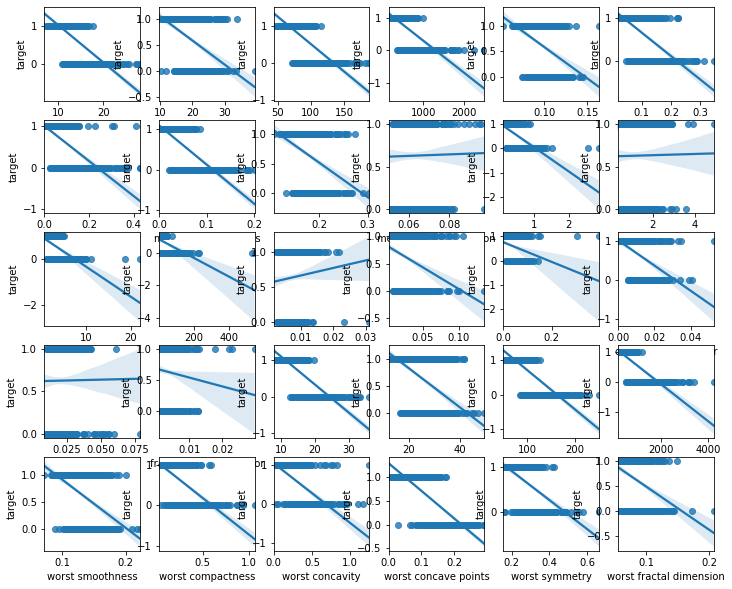

In [57]:
fig, axs = plt.subplots(nrows=5, ncols=6, figsize=(12,10))
for i, feature in enumerate(X):
    row, col = i//6, i%6
    sns.regplot(x=feature, y=y,data=df, ax=axs[row][col])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=2021, test_size=0.3
)

- 우선 표준화

In [39]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

- 랜덤 포레스트

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=2021)
rfc.fit(X_train_std, y_train)
rfc.score(X_test_std, y_test)

0.9766081871345029

- 머이래 높음? 하지만 더 높이기 위해 파라메타 튜닝

In [41]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2021,
 'verbose': 0,
 'warm_start': False}

In [42]:
param = {'max_depth' : [1,2,3,4,5], 'max_leaf_nodes' : [2,3,4,5], 'min_samples_split' : [2,3,4,5]}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(rfc,param, scoring='accuracy',n_jobs=-1, cv=3, verbose=1)
grid.fit(X_train_std, y_train)
grid.score(X_test_std, y_test)  # 더 낮아짐 쒯

Fitting 3 folds for each of 80 candidates, totalling 240 fits


0.9707602339181286

In [43]:
grid.best_params_ # max_leaf와 min_samples 값 수정 필요

{'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_split': 2}

In [44]:
param = {'max_depth' : [1,2,3,4,5], 'max_leaf_nodes' : [2,3,4,5,6,7], 'min_samples_split' : [1,2,3,4,5,6,7]}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(rfc,param, scoring='accuracy',n_jobs=-1, cv=3, verbose=1)
grid.fit(X_train_std, y_train)
grid.score(X_test_std, y_test)  # 처음이랑 같은 값??

Fitting 3 folds for each of 210 candidates, totalling 630 fits


C:\Users\ICT01_02\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.91201489 0.91201489 0.91201489 0.91201489 0.91201489
 0.91201489        nan 0.91201489 0.91201489 0.91201489 0.91201489
 0.91201489 0.91201489        nan 0.91201489 0.91201489 0.91201489
 0.91201489 0.91201489 0.91201489        nan 0.91201489 0.91201489
 0.91201489 0.91201489 0.91201489 0.91201489        nan 0.91201489
 0.91201489 0.91201489 0.91201489 0.91201489 0.91201489        nan
 0.91201489 0.91201489 0.91201489 0.91201489 0.91201489 0.91201489
        nan 0.91201489 0.91201489 0.91201489 0.91201489 0.91201489
 0.91201489        nan 0.92959672 0.92959672 0.92959672 0.92959672
 0.92959672 0.92959672        nan 0.93709653 0.93709653 0.93709653
 0.93709653 0.93709653 0.93709653        nan 0.93709653 0.93709653
 0.93709653 0.93709653 0.93709653 0.93709653        nan 0.93709653
 0.93709653 0.93709653 0.93709653 0.93709653 0.937

0.9766081871345029

- 정규화 했을때 한번 보자

In [45]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_mms = mms.fit_transform(X_train)
X_test_mms = mms.fit_transform(X_test)

- 랜덤 포레스트

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc_mms = RandomForestClassifier(random_state=2021)
rfc_mms.fit(X_train_mms, y_train)
rfc_mms.score(X_test_mms, y_test) # 랜덤 스테이트 주고 높아짐!

0.9649122807017544

- 가장 중요한 robust 했을때 보자

In [47]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
X_train_rb = rb.fit_transform(X_train)
X_test_rb = rb.fit_transform(X_test)

- 랜덤 포레스트

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc_rb = RandomForestClassifier(random_state=2021)
rfc_rb.fit(X_train_rb, y_train)
rfc_rb.score(X_test_rb, y_test) # robust주니 높아짐!

0.9766081871345029

- 표준화 한 데이터로 모델을 돌릴 때 가장 정확도가 높다!

- voting기법으로 여러개 분류법을 돌려보자

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
dtc = DecisionTreeClassifier(max_depth=None, criterion='entropy',random_state=2021)
knn = KNeighborsClassifier(n_neighbors=1,p=2,metric='minkowski')
lr = LogisticRegression(solver='liblinear', penalty='l2',C=0.001, random_state=2021)
vote_estimator = [('lr', lr),('dtc', dtc),('knn', knn),('rfc',rfc)]
voting = VotingClassifier(vote_estimator, voting='soft')
voting.fit(X_train_std, y_train)
voting.score(X_test_std, y_test)


0.9766081871345029

In [50]:
clf = ['logistic','decision tree','kneighbor','random forest','majority voting']
all_clf = [lr, dtc, knn, rfc,voting]

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
for key, label in zip(all_clf, clf):
    scores = cross_val_score(key, X=X_train_std, y=y_train, cv=10, scoring='accuracy')
    print(label, scores.mean())

logistic 0.9371794871794872
decision tree 0.9294871794871795
kneighbor 0.9446794871794871
random forest 0.9546794871794873
majority voting 0.9671794871794871


- 정확도를 voting으로 돌리긴 했지만, 각 기법에 따라 데이터 가공이 최적화 되지 않아 권장하진 않는다

- 정오행렬을 만들어서 검증해보자 정규화데이터

In [53]:
from sklearn.metrics import classification_report
for key, label in zip(all_clf, clf):
    model = key.fit(X_train_std, y_train)
    y_pred = key.predict(X_test_std)
    print(label)
    print(f'잘못 분류한 샘플 개수 : %d' % (y_test != y_pred).sum())
    print(classification_report(y_test, y_pred, target_names=['1','0']))

logistic
잘못 분류한 샘플 개수 : 9
              precision    recall  f1-score   support

           1       0.91      0.95      0.93        64
           0       0.97      0.94      0.96       107

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171

decision tree
잘못 분류한 샘플 개수 : 10
              precision    recall  f1-score   support

           1       0.95      0.89      0.92        64
           0       0.94      0.97      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

kneighbor
잘못 분류한 샘플 개수 : 6
              precision    recall  f1-score   support

           1       0.97      0.94      0.95        64
           0       0.96      0.98      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96

- kneighbor가 정확도가 가장 높게 나왔다!

- 이번에는 roc-auc 검증을 voting으로 해보자

In [54]:
for key, label in zip(all_clf, clf):
    roc = cross_val_score(key, X=X_train_std, y=y_train, cv=10, scoring='roc_auc')
    print(label, roc.mean()) # 추가검증 필요한가?

logistic 0.982057142857143
decision tree 0.9283809523809522
kneighbor 0.9363809523809523
random forest 0.9870380952380954
majority voting 0.989295238095238


- kneigbor가 정확도가 좋은 모델같은데 k=1말고 더 다양한 수를 줘보자

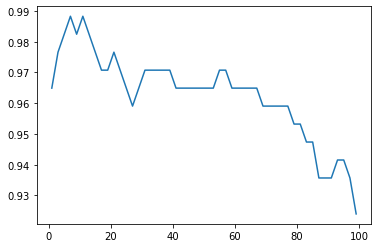

In [55]:
ab = range(1,101,2)
acc1=[]
for i in range(1,101,2):
    knn = KNeighborsClassifier(n_neighbors=i,p=2,metric='minkowski')
    knn.fit(X_train_std, y_train)
    acc1.append(knn.score(X_test_std, y_test))
    
plt.plot(ab,acc1)
plt.show()
    

In [56]:
# 약 mean radius 가 17이상부터 양성 반응 나타남 새로운 데이터 생성
#df['mean_radius17'] = np.where(df['mean radius'] >= 17,1,0)
#df2 = df.drop(columns='mean radius', inplace=True)